In [ ]:
# Below code from https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_ames_housing.html

In [1]:
import pandas as pd

ames_housing = pd.read_csv("HousingData.csv", na_values="?")
ames_housing = ames_housing.drop(columns="Id")
ames_housing = ames_housing.drop(columns="Longitude")
ames_housing = ames_housing.drop(columns="Latitude")

In [2]:
ames_housing.head()

MS_SubClass                 MS_Zoning  \
0  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
1  One_Story_1946_and_Newer_All_Styles  Residential_High_Density   
2  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
3  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
4             Two_Story_1946_and_Newer   Residential_Low_Density   

   Lot_Frontage  Lot_Area Street            Alley           Lot_Shape  \
0           141     31770   Pave  No_Alley_Access  Slightly_Irregular   
1            80     11622   Pave  No_Alley_Access             Regular   
2            81     14267   Pave  No_Alley_Access  Slightly_Irregular   
3            93     11160   Pave  No_Alley_Access             Regular   
4            74     13830   Pave  No_Alley_Access  Slightly_Irregular   

  Land_Contour Utilities Lot_Config  ... Pool_Area  Pool_QC            Fence  \
0          Lvl    AllPub     Corner  ...         0  No_Pool         No_Fence   
1          Lvl    AllPub     Inside  ...         0  No_Pool  Minimum_Privacy   
2          Lvl    AllPub     Corner  ...         0  No_Pool         No_Fence   
3          Lvl    AllPub     Corner  ...         0  No_Pool         No_Fence   
4          Lvl    AllPub     Inside  ...         0  No_Pool  Minimum_Privacy   

  Misc_Feature Misc_Val Mo_Sold Year_Sold Sale_Type  Sale_Condition  \
0          NaN        0       5      2010       WD           Normal   
1          NaN        0       6      2010       WD           Normal   
2         Gar2    12500       6      2010       WD           Normal   
3          NaN        0       4      2010       WD           Normal   
4          NaN        0       3      2010       WD           Normal   

   Sale_Price  
0      215000  
1      105000  
2      172000  
3      244000  
4      189900  

[5 rows x 79 columns]

In [3]:
target_name = "Sale_Price"
data, target = (
    ames_housing.drop(columns=target_name),
    ames_housing[target_name],
)

In [4]:
target.head()

0    215000
1    105000
2    172000
3    244000
4    189900
Name: Sale_Price, dtype: int64

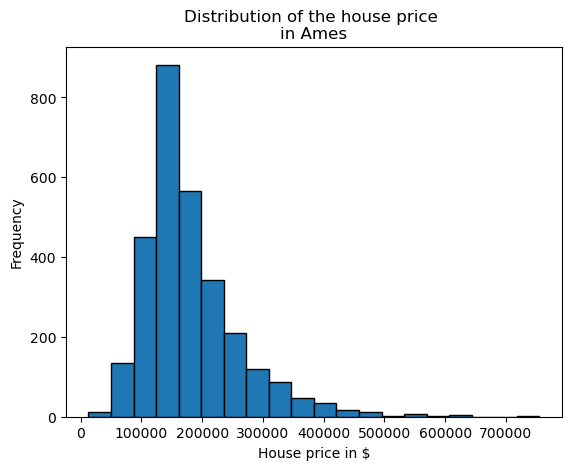

In [5]:
import matplotlib.pyplot as plt

target.plot.hist(bins=20, edgecolor="black")
plt.xlabel("House price in $")
_ = plt.title("Distribution of the house price \nin Ames")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 78 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   MS_SubClass         2930 non-null   object
 1   MS_Zoning           2930 non-null   object
 2   Lot_Frontage        2930 non-null   int64 
 3   Lot_Area            2930 non-null   int64 
 4   Street              2930 non-null   object
 5   Alley               2930 non-null   object
 6   Lot_Shape           2930 non-null   object
 7   Land_Contour        2930 non-null   object
 8   Utilities           2930 non-null   object
 9   Lot_Config          2930 non-null   object
 10  Land_Slope          2930 non-null   object
 11  Neighborhood        2930 non-null   object
 12  Condition_1         2930 non-null   object
 13  Condition_2         2930 non-null   object
 14  Bldg_Type           2930 non-null   object
 15  House_Style         2930 non-null   object
 16  Overall_Qual        2930

In [7]:
numerical_data = data.select_dtypes("number")
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Lot_Frontage        2930 non-null   int64
 1   Lot_Area            2930 non-null   int64
 2   Year_Built          2930 non-null   int64
 3   Year_Remod_Add      2930 non-null   int64
 4   Mas_Vnr_Area        2930 non-null   int64
 5   BsmtFin_SF_1        2930 non-null   int64
 6   BsmtFin_SF_2        2930 non-null   int64
 7   Bsmt_Unf_SF         2930 non-null   int64
 8   Total_Bsmt_SF       2930 non-null   int64
 9   First_Flr_SF        2930 non-null   int64
 10  Second_Flr_SF       2930 non-null   int64
 11  Low_Qual_Fin_SF     2930 non-null   int64
 12  Gr_Liv_Area         2930 non-null   int64
 13  Bsmt_Full_Bath      2930 non-null   int64
 14  Bsmt_Half_Bath      2930 non-null   int64
 15  Full_Bath           2930 non-null   int64
 16  Half_Bath           2930 non-null   int64


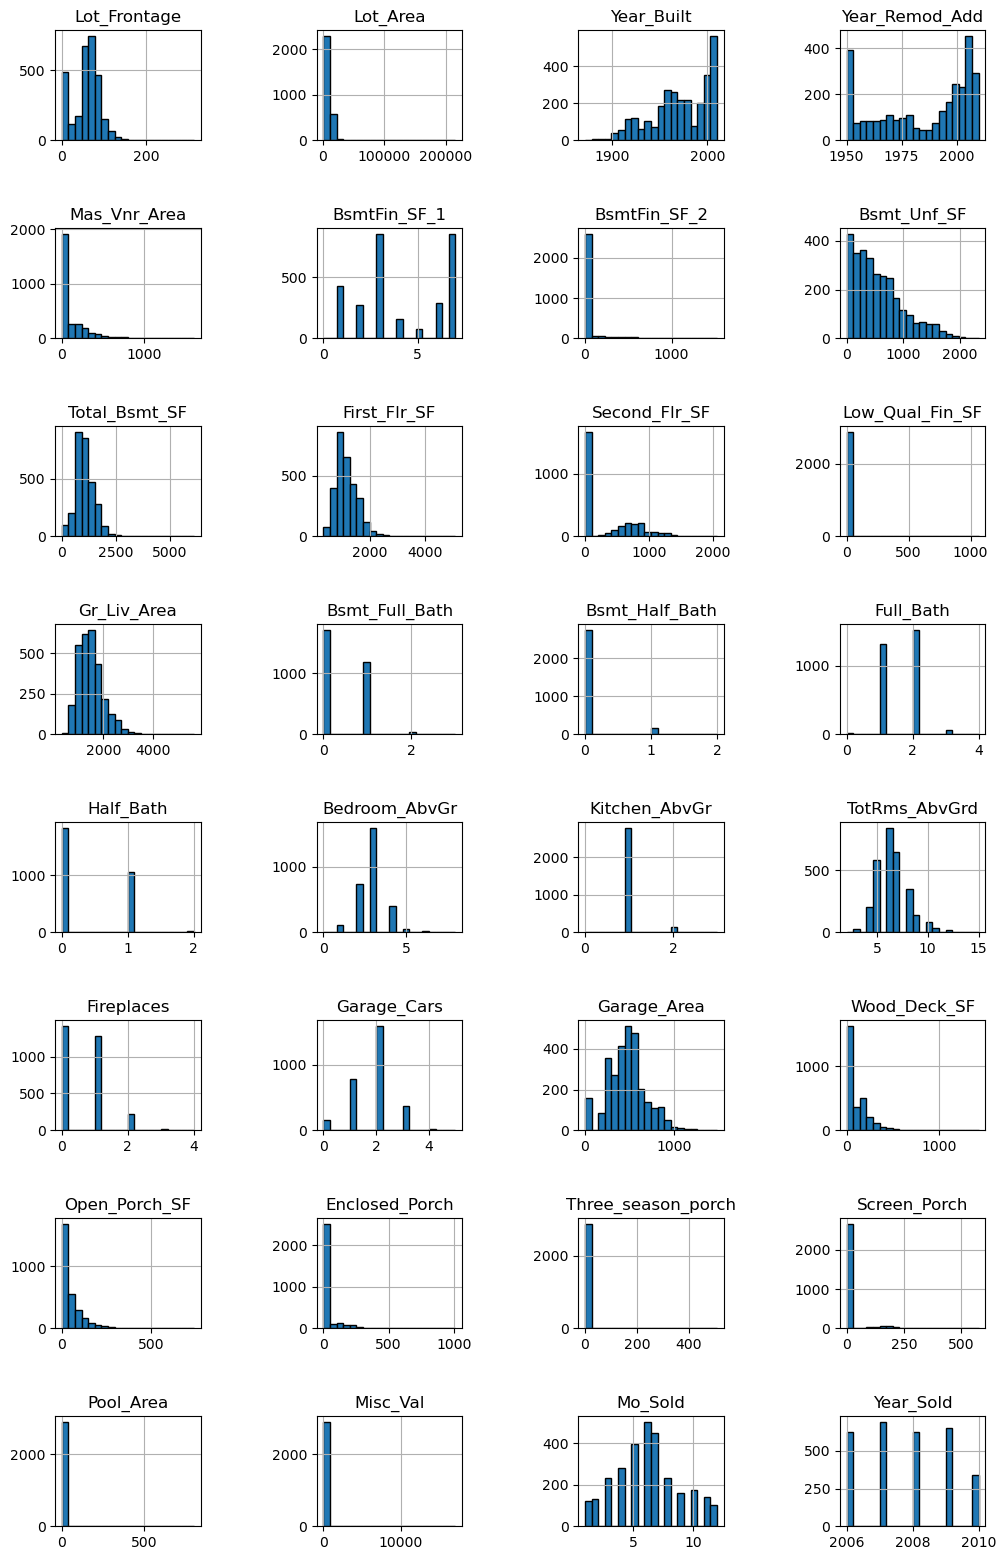

In [8]:
numerical_data.hist(
    bins=20, figsize=(12, 22), edgecolor="black", layout=(9, 4)
)
plt.subplots_adjust(hspace=0.8, wspace=0.8)

In [9]:
string_data = data.select_dtypes(object)
string_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS_SubClass     2930 non-null   object
 1   MS_Zoning       2930 non-null   object
 2   Street          2930 non-null   object
 3   Alley           2930 non-null   object
 4   Lot_Shape       2930 non-null   object
 5   Land_Contour    2930 non-null   object
 6   Utilities       2930 non-null   object
 7   Lot_Config      2930 non-null   object
 8   Land_Slope      2930 non-null   object
 9   Neighborhood    2930 non-null   object
 10  Condition_1     2930 non-null   object
 11  Condition_2     2930 non-null   object
 12  Bldg_Type       2930 non-null   object
 13  House_Style     2930 non-null   object
 14  Overall_Qual    2930 non-null   object
 15  Overall_Cond    2930 non-null   object
 16  Roof_Style      2930 non-null   object
 17  Roof_Matl       2930 non-null   object
 18  Exterior

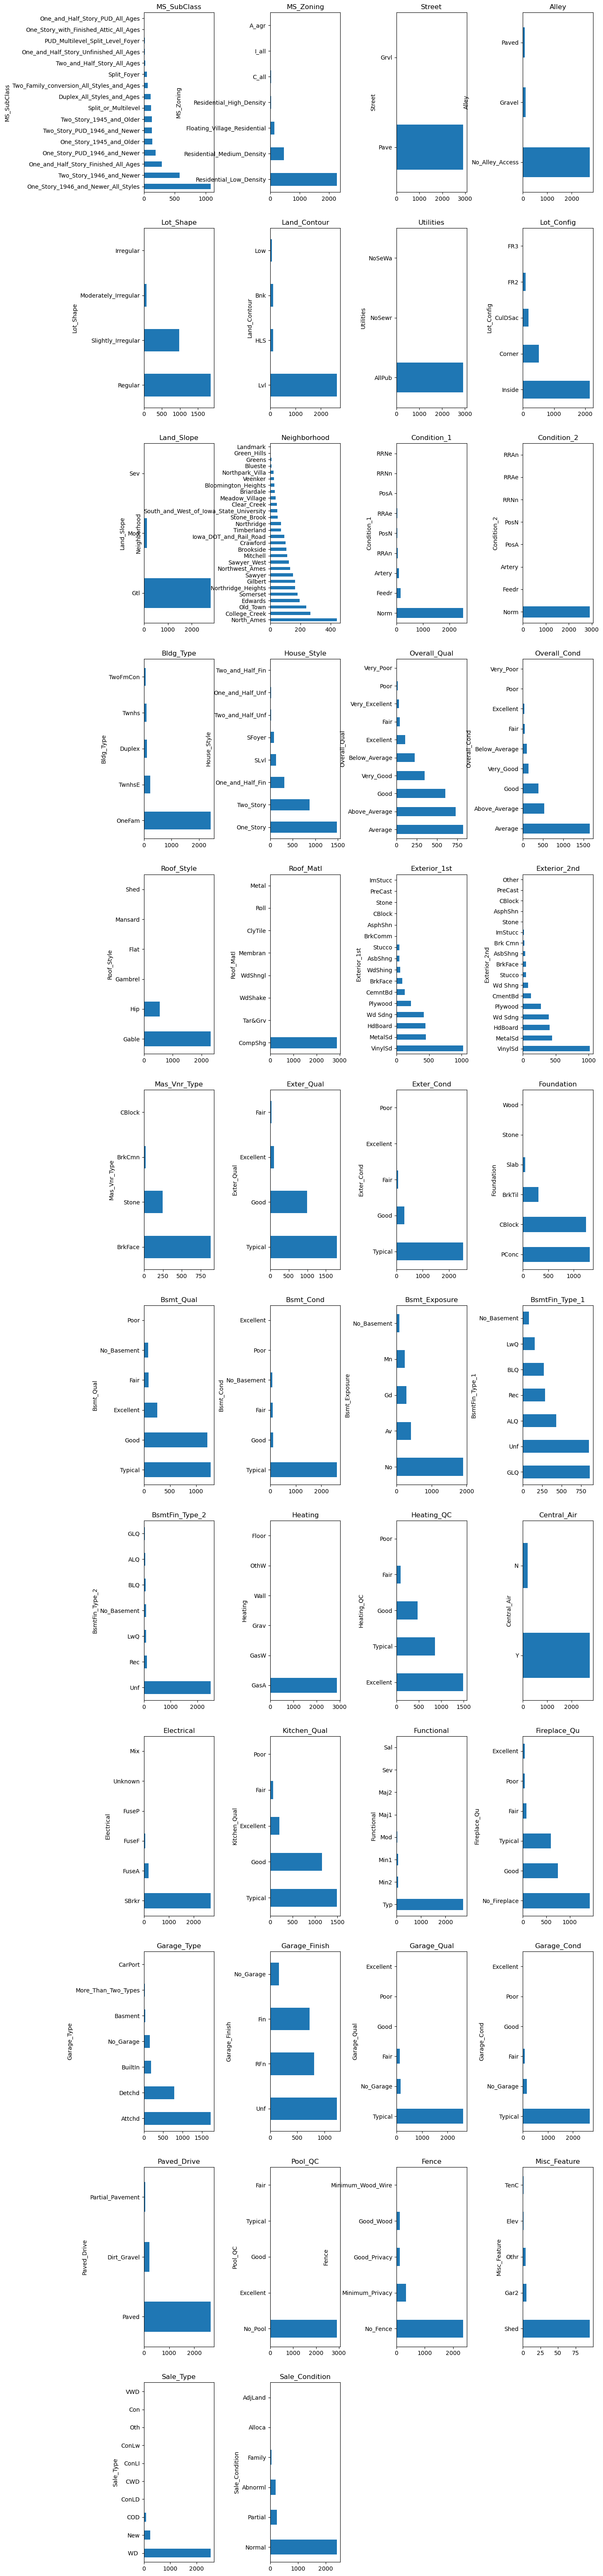

In [10]:
from math import ceil
from itertools import zip_longest

n_string_features = string_data.shape[1]
nrows, ncols = ceil(n_string_features / 4), 4

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(14, 80))

for feature_name, ax in zip_longest(string_data, axs.ravel()):
    if feature_name is None:
        # do not show the axis
        ax.axis("off")
        continue

    string_data[feature_name].value_counts().plot.barh(ax=ax)
    ax.set_title(feature_name)

plt.subplots_adjust(hspace=0.2, wspace=0.8)